# 7.6.1 Mixtura de modelos gaussianos

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/qoPhqL_UEBU?si=upz53aEmCpoUMAQo

Este es un modelo en el cual, la probabilidad de ocurrencia de una observación multidimensional $θ$ es obtenida como la suma ponderada de $K$ distribuciones normales:

$$ p(\sigma) = \sum_{i}^{K} \phi_i N(\mu_i, \Sigma_i) = \sum_{i}^{} p_i(\theta) $$

Los parámetros del modelo $(\theta_i, \mu_i, \Sigma_i)$ son estimados usando el algoritmo EM.

En clustering, las probabilidades de pertenencia a cada normal $p_i$($\theta$ pueden usarse para asignar el patrón $\theta$) a uno de los $K$ clusters.

## 7.6.1.1 Clustering usando GMM

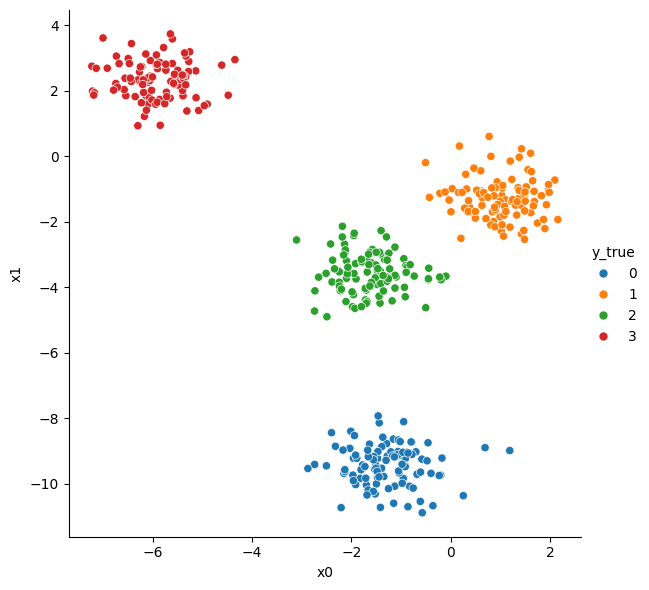

In [4]:
#
# Creación de una muestra de 400 puntos pertenecientes a
# cuatro clusters
#
X, y_true = make_blobs(
    n_samples=400,
    centers=4,
    cluster_std=0.60,
    random_state=2,
)

data = pd.DataFrame(X, columns=["x0", "x1"])
data["y_true"] = y_true

sns.relplot(
    x="x0",
    y="x1",
    data=data,
    hue="y_true",
    height=6,
    palette="tab10",
)
plt.show()

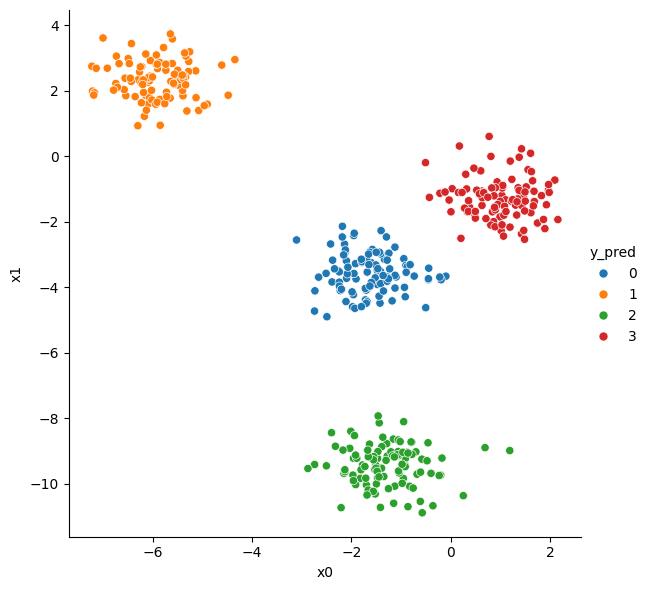

In [7]:
n_components = 4
gaussianMixture = GaussianMixture(
    # -----------------------------------------------------
    # The number of mixture components.
    n_components=n_components,
    # -----------------------------------------------------
    # String describing the type of covariance parameters
    # to use. Must be one of:
    # ‘full’
    #    each component has its own general covariance
    #    matrix
    # ‘tied’
    #    all components share the same general covariance
    #    matrix
    # ‘diag’
    #    each component has its own diagonal covariance matrix
    # ‘spherical’
    #    each component has its own single variance
    covariance_type="full",
    # -----------------------------------------------------
    # The number of EM iterations to perform.
    max_iter=100,
    # -----------------------------------------------------
    # The method used to initialize the weights
    #   'kmeans'
    #   'random'
    init_params="kmeans",
)

gaussianMixture.fit(X)
data["y_pred"] = gaussianMixture.predict(X)

sns.relplot(
    x="x0",
    y="x1",
    data=data,
    hue="y_pred",
    height=6,
    palette="tab10",
)
plt.show()

In [8]:
proba = gaussianMixture.predict_proba(X)
display(proba[:8].round(3))

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [9]:
#
# Pesos de cada componente
#
gaussianMixture.weights_

array([0.25005837, 0.25      , 0.25      , 0.24994163])

In [10]:
#
# Media de cada componente
#
gaussianMixture.means_

array([[-1.62893728, -3.56759624],
       [-5.92531007,  2.31015845],
       [-1.27700758, -9.43804623],
       [ 1.00147535, -1.29081199]])

In [11]:
#
# Covarianza de cada componente
#
gaussianMixture.covariances_

array([[[ 0.34937955, -0.0183811 ],
        [-0.0183811 ,  0.35510656]],

       [[ 0.34694469, -0.00826231],
        [-0.00826231,  0.32514874]],

       [[ 0.44133337, -0.02051966],
        [-0.02051966,  0.37350909]],

       [[ 0.34423644, -0.02837746],
        [-0.02837746,  0.3946147 ]]])

## 7.6.1.2 Interpretación

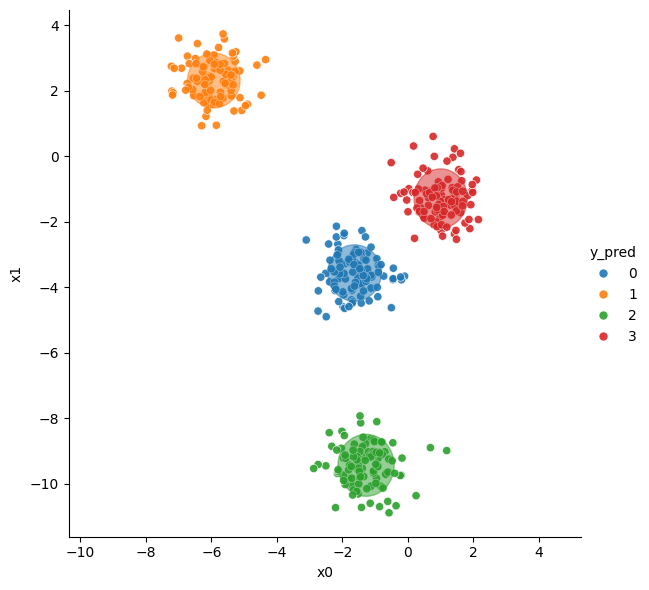

In [13]:
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

sns.relplot(
    x="x0",
    y="x1",
    data=data,
    hue="y_pred",
    height=6,
    palette="tab10",
    alpha=0.9,
)

for i_component in range(n_components):

    covariances = gaussianMixture.covariances_[i_component][:2, :2]

    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

    ellipse = Ellipse(
        gaussianMixture.means_[i_component, :2],
        v[0],
        v[1],
        #180 + angle,
        color=colors[i_component],
    )
    ellipse.set_clip_box(plt.gca().bbox)
    ellipse.set_alpha(0.5)
    plt.gca().add_artist(ellipse)

plt.gca().set_aspect("equal", "datalim")

## 7.6.1.3 Número óptimo de componentes

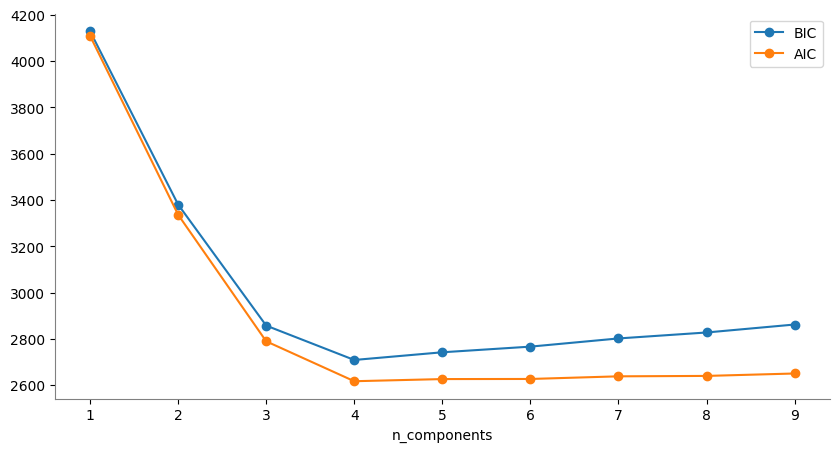

In [15]:
#
# Numero de componentes
#
n_components = np.arange(1, 10)

gaussianModels = [
    GaussianMixture(n, covariance_type="full", random_state=0).fit(X)
    for n in n_components
]

plt.figure(figsize=(10, 5))
plt.plot(n_components, [model.bic(X) for model in gaussianModels], "o-", label="BIC")
plt.plot(n_components, [model.aic(X) for model in gaussianModels], "o-", label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [5]:
print('ok_')

ok_
